In [35]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [36]:
analysis = scripts.Analysis()

In [37]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_7_dlogN_.25_.25_.125_.125_.125_.125',
                          'wgt_1_.85_.7_.6_.6_.45_.45',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [38]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_7_dlogN_.25_.25_.125_.125_.125_.125',
                               'wgt_1_.85_.7_.6_.6_.45_.45',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [39]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [40]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [41]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [42]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [43]:
fig.display_hrefanchor()

In [44]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [45]:
table_dgdgs.display_hrefanchor()

In [46]:
for g in [1, 2, 3, 4, 5, 6, 7]:
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

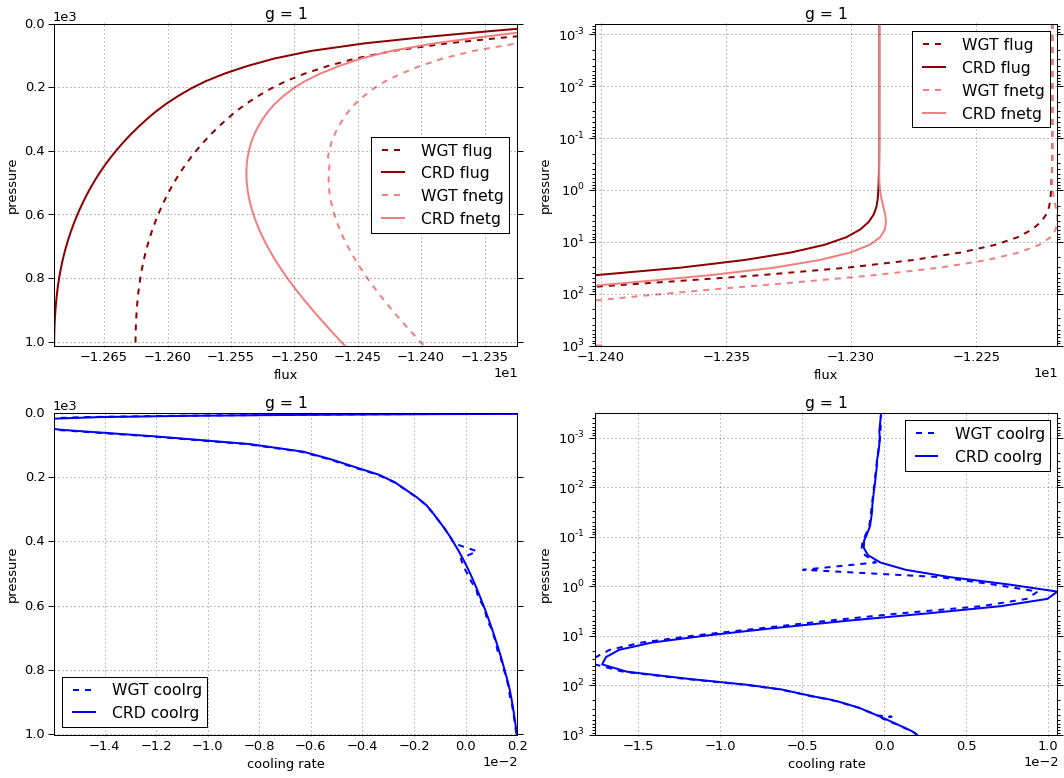

# Figure: flux, cooling rate. g-group 2

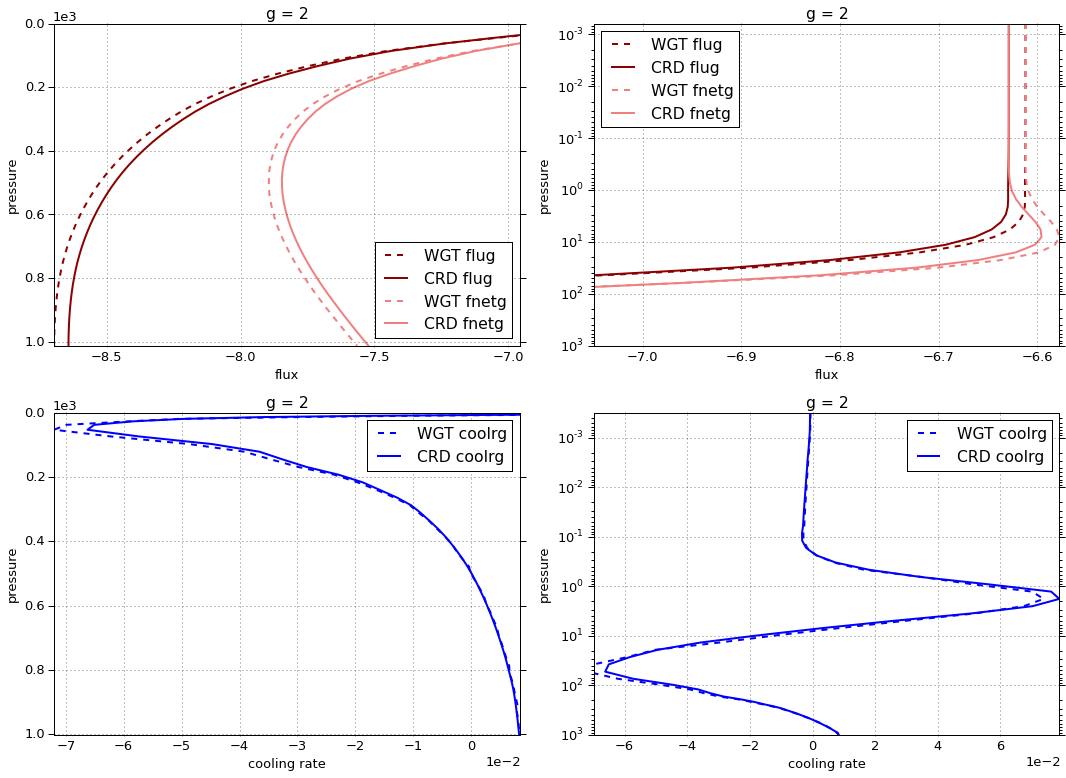

# Figure: flux, cooling rate. g-group 3

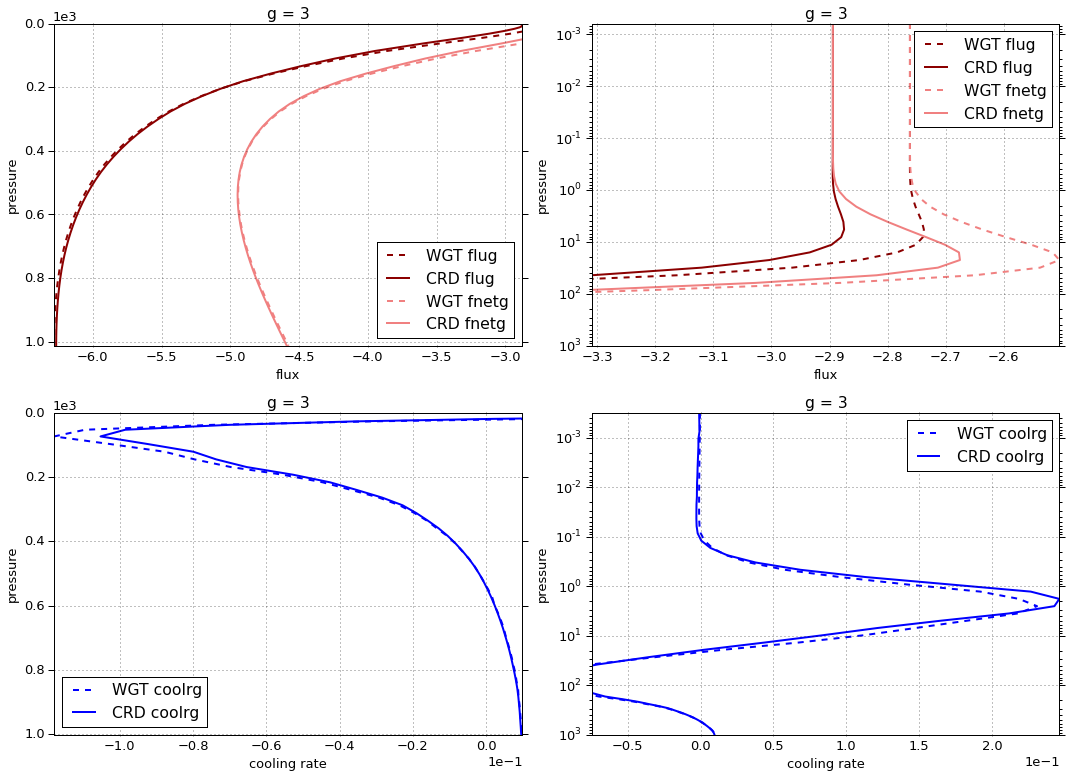

# Figure: flux, cooling rate. g-group 4

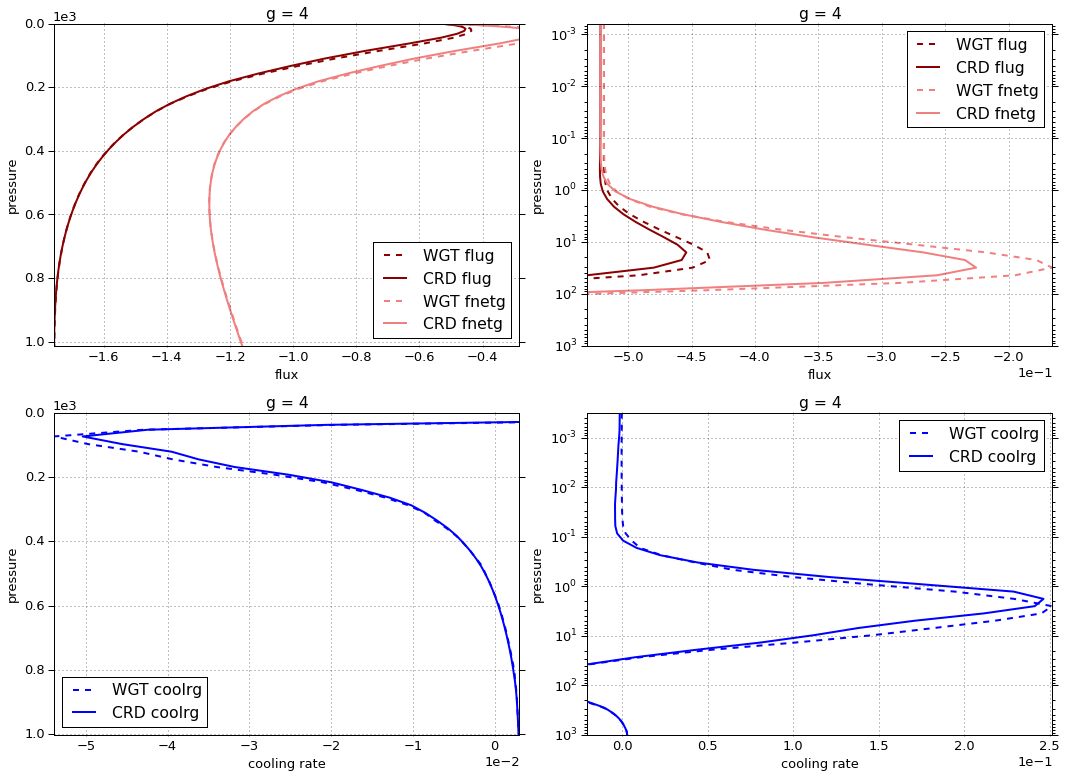

# Figure: flux, cooling rate. g-group 5

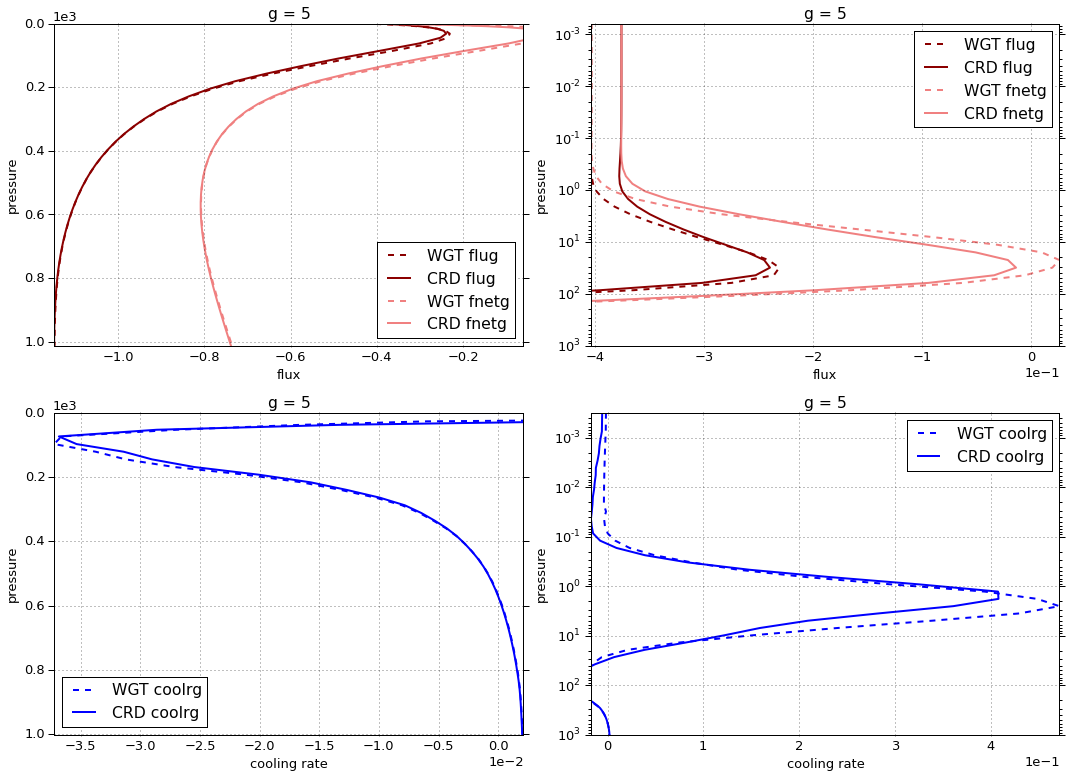

# Figure: flux, cooling rate. g-group 6

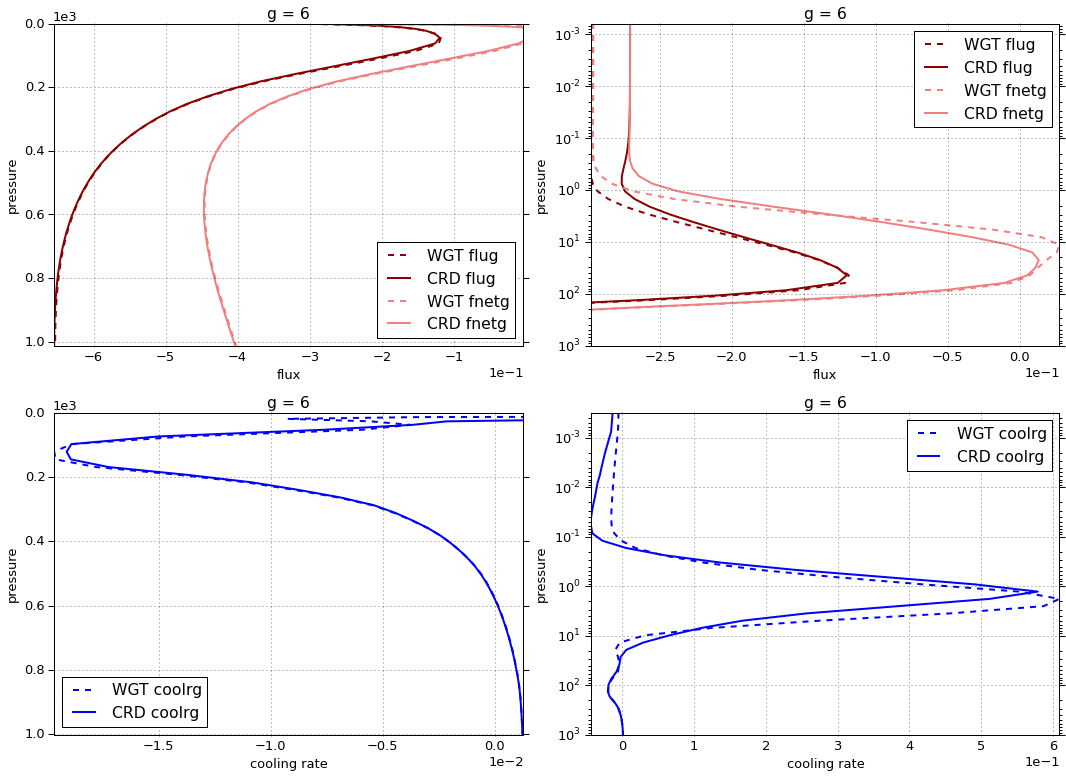

# Figure: flux, cooling rate. g-group 7

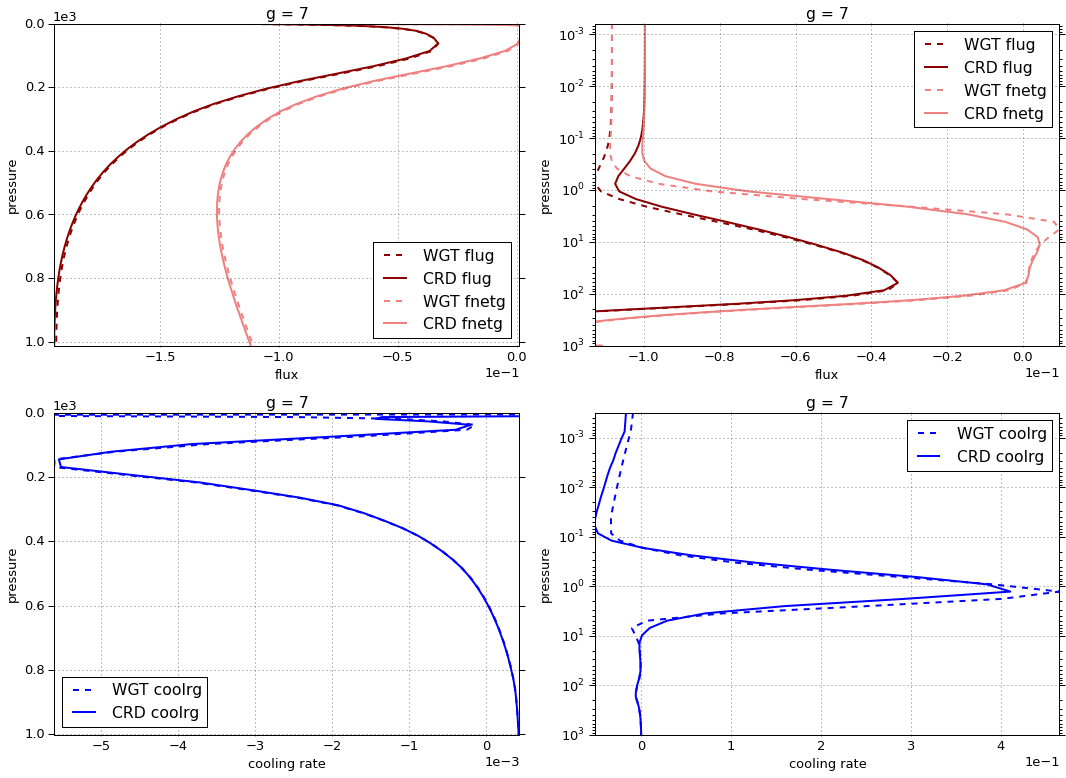

# Figure: flux, cooling rate. g-group total

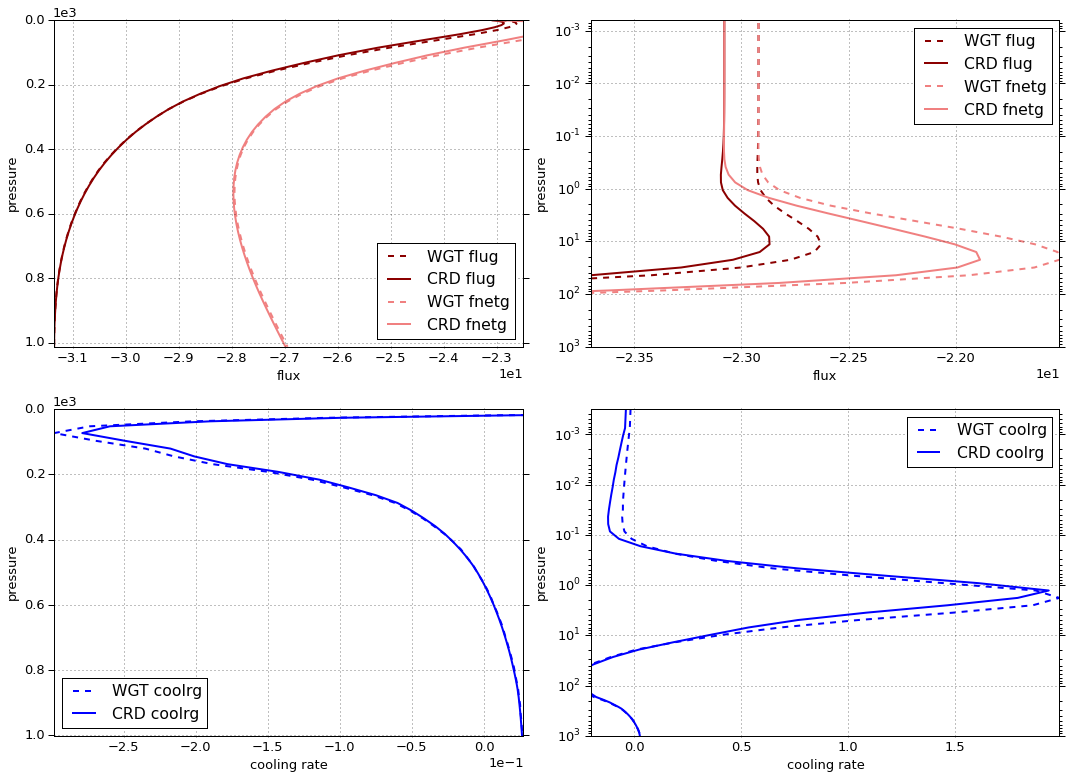

In [47]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [48]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.288814  0.000000 -12.288814
  1013     76    -12.689491  0.229281 -12.460210
2 0        1      -6.628732  0.000000  -6.628732
  1013     76     -8.642164  1.119830  -7.522335
3 0        1      -2.894177  0.000000  -2.894177
  1013     76     -6.267902  1.677702  -4.590200
4 0        1      -0.521889  0.000000  -0.521889
  1013     76     -1.756885  0.595423  -1.161462
5 0        1      -0.375749  0.000000  -0.375749
  1013     76     -1.148512  0.410066  -0.738446
6 0        1      -0.270839  0.000000  -0.270839
  1013     76     -0.654626  0.250901  -0.403725
7 0        1      -0.099757  0.000000  -0.099757
  1013     76     -0.194655  0.082789  -0.111865


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.219587  0.000000 -12.219587
  1013     76    -12.625357  0.227582 -12.397775
2 0        1      -6.611871  0.000000  -6.611871
  1013     76     -8.695656  1.130806  -7.564850
3 0        1      -2.761529  0.000000  -2.761529
  1013     76     -6.282540  1.704450  -4.578090
4 0        1      -0.519153  0.000000  -0.519153
  1013     76     -1.756150  0.596673  -1.159477
5 0        1      -0.403374  0.000000  -0.403374
  1013     76     -1.147508  0.411629  -0.735879
6 0        1      -0.296524  0.000000  -0.296524
  1013     76     -0.653250  0.250970  -0.402280
7 0        1      -0.108462  0.000000  -0.108462
  1013     76     -0.193775  0.082928  -0.110847


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.069227  0.000000  0.069227
  1013     76     0.064134 -0.001699  0.062435
2 0        1      0.016861  0.000000  0.016861
  1013     76    -0.053491  0.010976 -0.042515
3 0        1      0.132647  0.000000  0.132647
  1013     76    -0.014639  0.026749  0.012110
4 0        1      0.002735  0.000000  0.002735
  1013     76     0.000735  0.001250  0.001985
5 0        1     -0.027625  0.000000 -0.027625
  1013     76     0.001004  0.001563  0.002567
6 0        1     -0.025685  0.000000 -0.025685
  1013     76     0.001376  0.000069  0.001445
7 0        1     -0.008705  0.000000 -0.008705
  1013     76     0.000880  0.000139  0.001019

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000204
  1001.112500 75     0.001985
2 0.000312    1     -0.000800
  1001.112500 75     0.008291
3 0.000312    1     -0.000933
  1001.112500 75     0.009604
4 0.000312    1     -0.001407
  1001.112500 75     0.002922
5 0.000312    1     -0.005579
  1001.112500 75     0.001990
6 0.000312    1     -0.013159
  1001.112500 75     0.001237
7 0.000312    1     -0.016422
  1001.112500 75     0.000417


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000217
  1001.112500 75     0.001969
2 0.000312    1     -0.000690
  1001.112500 75     0.008423
3 0.000312    1     -0.000408
  1001.112500 75     0.009774
4 0.000312    1     -0.000242
  1001.112500 75     0.002953
5 0.000312    1     -0.001661
  1001.112500 75     0.002017
6 0.000312    1     -0.005002
  1001.112500 75     0.001238
7 0.000312    1     -0.008617
  1001.112500 75     0.000416


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.231886e-05
  1001.112500 75    -1.602200e-05
2 0.000312    1      1.094007e-04
  1001.112500 75     1.317950e-04
3 0.000312    1      5.243158e-04
  1001.112500 75     1.699300e-04
4 0.000312    1      1.164535e-03
  1001.112500 75     3.027160e-05
5 0.000312    1      3.918638e-03
  1001.112500 75     2.647780e-05
6 0.000312    1      8.157316e-03
  1001.112500 75     1.495700e-06
7 0.000312    1      7.805147e-03
  1001.112500 75    -6.689900e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.079957,0.000000,-23.079957
1013,76,-31.354235,4.365992,-26.988243



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.920502,0.000000,-22.920502
1013,76,-31.354236,4.405038,-26.949197



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.594555e-01,0.000000,0.159456
1013,76,-2.000000e-07,0.039046,0.039046


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.038504
1001.112500,75,0.026446



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.016837
1001.112500,75,0.026790



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.021667
1001.112500,75,0.000343


In [49]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.411200,0.402668
2,0.271083,0.277336
3,0.198117,0.200373
4,0.055883,0.056010
5,0.036567,0.036598
6,0.020900,0.020835
7,0.006250,0.006180


In [50]:
writer = pd.ExcelWriter('results.xlsx')

In [51]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

wgt                                 crd                \
                  flug          fldg      fnetg       flug          fldg   
pressure                                                                   
0.000000    -12.219587  0.000000e+00 -12.219587 -12.288814  0.000000e+00   
0.000624    -12.219587  3.190708e-09 -12.219587 -12.288814  3.271210e-09   
0.000876    -12.219587  4.650985e-09 -12.219587 -12.288814  4.768688e-09   
0.001229    -12.219587  7.189032e-09 -12.219587 -12.288814  7.372787e-09   
0.001723    -12.219587  1.148660e-08 -12.219587 -12.288814  1.178465e-08   
0.002417    -12.219587  1.860056e-08 -12.219587 -12.288814  1.909181e-08   
0.003391    -12.219587  3.018080e-08 -12.219587 -12.288814  3.099309e-08   
0.004757    -12.219587  4.878014e-08 -12.219587 -12.288814  5.011850e-08   
0.006672    -12.219587  7.833081e-08 -12.219587 -12.288814  8.052144e-08   
0.009359    -12.219587  1.248694e-07 -12.219587 -12.288814  1.284280e-07   
0.013128    -12.219588  1.976235e-07 -12.219587 -12.288815  2.033606e-07   
0.018415    -12.219588  3.106760e-07 -12.219588 -12.288815  3.198598e-07   
0.025830    -12.219589  4.854148e-07 -12.219589 -12.288816  5.000196e-07   
0.036232    -12.219590  7.543738e-07 -12.219590 -12.288817  7.774640e-07   
0.050823    -12.219592  1.170326e-06 -12.219591 -12.288819  1.206753e-06   
0.071291    -12.219595  1.865725e-06 -12.219593 -12.288822  1.925556e-06   
0.100000    -12.219600  3.326214e-06 -12.219597 -12.288827  3.441577e-06   
0.140271    -12.219610  6.808863e-06 -12.219603 -12.288837  7.076909e-06   
0.196760    -12.219628  1.491845e-05 -12.219613 -12.288854  1.558468e-05   
0.275997    -12.219657  3.327983e-05 -12.219624 -12.288882  3.493042e-05   
0.387100    -12.219705  7.399377e-05 -12.219631 -12.288929  7.797604e-05   
0.543100    -12.219886  1.628728e-04 -12.219723 -12.288999  1.721868e-04   
0.761700    -12.219989  3.522621e-04 -12.219637 -12.289098  3.732846e-04   
1.068500    -12.220137  7.396143e-04 -12.219398 -12.289236  7.848131e-04   
1.498800    -12.220380  1.458846e-03 -12.218921 -12.289461  1.547354e-03   
2.102400    -12.220898  2.596734e-03 -12.218301 -12.289953  2.748467e-03   
2.949000    -12.221994  4.286654e-03 -12.217707 -12.291012  4.520245e-03   
4.136600    -12.224166  6.583910e-03 -12.217582 -12.293034  6.906311e-03   
5.802500    -12.227734  9.472481e-03 -12.218262 -12.296446  9.874041e-03   
8.139200    -12.233377  1.306479e-02 -12.220312 -12.301940  1.352465e-02   
...                ...           ...        ...        ...           ...   
323.525000  -12.559704  9.441242e-02 -12.465291 -12.622792  9.416652e-02   
347.300000  -12.565757  9.751661e-02 -12.468241 -12.628883  9.731450e-02   
371.075000  -12.571323  1.007652e-01 -12.470558 -12.634493  1.005995e-01   
394.850000  -12.576466  1.041529e-01 -12.472313 -12.639683  1.040345e-01   
418.625000  -12.581259  1.077065e-01 -12.473553 -12.644527  1.076368e-01   
442.400000  -12.585700  1.133696e-01 -12.472331 -12.649022  1.113839e-01   
466.175000  -12.589789  1.169432e-01 -12.472846 -12.653165  1.152394e-01   
489.950000  -12.593532  1.204549e-01 -12.473077 -12.656962  1.191699e-01   
513.725000  -12.596978  1.241166e-01 -12.472861 -12.660462  1.231981e-01   
537.500000  -12.600171  1.279399e-01 -12.472231 -12.663710  1.273464e-01   
561.275000  -12.603118  1.320618e-01 -12.471057 -12.666711  1.316003e-01   
585.050000  -12.605840  1.361411e-01 -12.469699 -12.669485  1.359652e-01   
608.825000  -12.608350  1.405077e-01 -12.467843 -12.672045  1.404474e-01   
632.600000  -12.610651  1.449780e-01 -12.465673 -12.674395  1.450369e-01   
656.375000  -12.612753  1.494200e-01 -12.463333 -12.676543  1.497272e-01   
680.150000  -12.614662  1.541068e-01 -12.460555 -12.678497  1.545194e-01   
703.925000  -12.616382  1.588834e-01 -12.457499 -12.680260  1.594015e-01   
727.700000  -12.617920  1.637475e-01 -12.454173 -12.681837  1.643657e-01   
751.475000  -12.619284  1.685977e-01 -12.450687 -12.683237  1.69420

In [52]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -6.611871  0.000000e+00 -6.611871 -6.628732  0.000000e+00   
0.000624    -6.611871  1.662135e-08 -6.611871 -6.628732  1.856208e-08   
0.000876    -6.611872  2.424016e-08 -6.611871 -6.628732  2.706085e-08   
0.001229    -6.611872  3.748775e-08 -6.611872 -6.628732  4.184422e-08   
0.001723    -6.611872  5.992922e-08 -6.611872 -6.628732  6.689773e-08   
0.002417    -6.611872  9.709408e-08 -6.611872 -6.628733  1.084044e-07   
0.003391    -6.611872  1.576194e-07 -6.611872 -6.628733  1.760244e-07   
0.004757    -6.611872  2.548768e-07 -6.611872 -6.628733  2.847156e-07   
0.006672    -6.611873  4.094765e-07 -6.611873 -6.628734  4.575346e-07   
0.009359    -6.611874  6.530815e-07 -6.611873 -6.628735  7.299015e-07   
0.013128    -6.611875  1.034131e-06 -6.611874 -6.628736  1.155994e-06   
0.018415    -6.611877  1.626623e-06 -6.611875 -6.628739  1.818547e-06   
0.025830    -6.611880  2.543064e-06 -6.611877 -6.628742  2.843286e-06   
0.036232    -6.611884  3.954818e-06 -6.611880 -6.628747  4.421562e-06   
0.050823    -6.611891  6.140223e-06 -6.611885 -6.628754  6.864060e-06   
0.071291    -6.611901  9.797458e-06 -6.611891 -6.628766  1.095434e-05   
0.100000    -6.611919  1.747636e-05 -6.611902 -6.628786  1.956874e-05   
0.140271    -6.611951  3.571704e-05 -6.611915 -6.628823  4.011385e-05   
0.196760    -6.612005  7.787002e-05 -6.611927 -6.628884  8.773905e-05   
0.275997    -6.612088  1.722399e-04 -6.611916 -6.628981  1.945603e-04   
0.387100    -6.612205  3.784130e-04 -6.611827 -6.629118  4.280539e-04   
0.543100    -6.612344  8.204106e-04 -6.611524 -6.629285  9.280709e-04   
0.761700    -6.612358  1.742726e-03 -6.610615 -6.629428  1.968294e-03   
1.068500    -6.612350  3.596130e-03 -6.608754 -6.629463  4.045816e-03   
1.498800    -6.612222  7.042480e-03 -6.605180 -6.629396  7.862085e-03   
2.102400    -6.612508  1.260208e-02 -6.599906 -6.629795  1.389492e-02   
2.949000    -6.614191  2.104996e-02 -6.593141 -6.631664  2.281144e-02   
4.136600    -6.618629  3.277831e-02 -6.585850 -6.636520  3.479484e-02   
5.802500    -6.627724  4.777801e-02 -6.579946 -6.646188  4.963092e-02   
8.139200    -6.644153  6.662741e-02 -6.577526 -6.663406  6.780060e-02   
...               ...           ...       ...       ...           ...   
323.525000  -8.308357  4.867559e-01 -7.821601 -8.254181  4.809058e-01   
347.300000  -8.346856  5.046639e-01 -7.842192 -8.292143  4.984924e-01   
371.075000  -8.381801  5.227348e-01 -7.859066 -8.326733  5.166937e-01   
394.850000  -8.413718  5.415458e-01 -7.872172 -8.358398  5.355035e-01   
418.625000  -8.443183  5.615813e-01 -7.881602 -8.387648  5.550116e-01   
442.400000  -8.470095  5.813540e-01 -7.888740 -8.414511  5.750307e-01   
466.175000  -8.494710  6.016592e-01 -7.893051 -8.439035  5.953757e-01   
489.950000  -8.516899  6.227913e-01 -7.894108 -8.461300  6.158725e-01   
513.725000  -8.537226  6.430732e-01 -7.894153 -8.481642  6.366097e-01   
537.500000  -8.555865  6.640959e-01 -7.891769 -8.500354  6.577057e-01   
561.275000  -8.572901  6.855691e-01 -7.887332 -8.517502  6.790736e-01   
585.050000  -8.588500  7.075295e-01 -7.880970 -8.533227  7.007573e-01   
608.825000  -8.602797  7.293786e-01 -7.873418 -8.547633  7.227628e-01   
632.600000  -8.615753  7.517337e-01 -7.864019 -8.560752  7.450246e-01   
656.375000  -8.627524  7.744271e-01 -7.853097 -8.572658  7.675299e-01   
680.150000  -8.638102  7.975871e-01 -7.840515 -8.583411  7.902746e-01   
703.925000  -8.647605  8.205087e-01 -7.827096 -8.593041  8.131847e-01   
727.700000  -8.656013  8.436819e-01 -7.812331 -8.601600  8.362480e-01   
751.475000  -8.663430  8.670878e-01 -7.796342 -8.609149  8.594847e-01   
775.250000  -8.669879  8.906763e-01 -7.779203 -8.615727  8.828414e-01   
799.025000  -8.675396  9.147124e-01 -7.760684 -8.621374  9.062569e-01   
822

In [53]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.761529  0.000000e+00 -2.761529 -2.894177  0.000000e+00   
0.000624    -2.761529  3.021222e-08 -2.761529 -2.894177  4.397522e-08   
0.000876    -2.761529  4.408645e-08 -2.761529 -2.894177  6.412190e-08   
0.001229    -2.761529  6.826311e-08 -2.761529 -2.894177  9.921427e-08   
0.001723    -2.761529  1.093117e-07 -2.761529 -2.894177  1.587670e-07   
0.002417    -2.761530  1.774470e-07 -2.761529 -2.894177  2.575613e-07   
0.003391    -2.761530  2.886659e-07 -2.761530 -2.894178  4.187211e-07   
0.004757    -2.761530  4.678011e-07 -2.761530 -2.894178  6.780991e-07   
0.006672    -2.761531  7.532361e-07 -2.761530 -2.894179  1.091031e-06   
0.009359    -2.761531  1.204114e-06 -2.761530 -2.894181  1.742634e-06   
0.013128    -2.761532  1.911207e-06 -2.761531 -2.894183  2.763268e-06   
0.018415    -2.761534  3.013672e-06 -2.761531 -2.894186  4.352269e-06   
0.025830    -2.761537  4.723935e-06 -2.761532 -2.894191  6.812969e-06   
0.036232    -2.761541  7.367029e-06 -2.761533 -2.894198  1.060770e-05   
0.050823    -2.761546  1.147364e-05 -2.761535 -2.894209  1.648796e-05   
0.071291    -2.761555  1.839542e-05 -2.761537 -2.894225  2.636637e-05   
0.100000    -2.761569  3.312780e-05 -2.761536 -2.894253  4.730774e-05   
0.140271    -2.761591  6.861993e-05 -2.761523 -2.894300  9.750973e-05   
0.196760    -2.761620  1.514516e-04 -2.761469 -2.894371  2.139407e-04   
0.275997    -2.761641  3.379528e-04 -2.761303 -2.894459  4.740164e-04   
0.387100    -2.761612  7.462218e-04 -2.760865 -2.894525  1.037513e-03   
0.543100    -2.761417  1.620393e-03 -2.759796 -2.894451  2.227619e-03   
0.761700    -2.760752  3.437401e-03 -2.757315 -2.893946  4.656538e-03   
1.068500    -2.759273  7.078849e-03 -2.752195 -2.892509  9.403413e-03   
1.498800    -2.756321  1.391335e-02 -2.742407 -2.889538  1.798295e-02   
2.102400    -2.751970  2.518797e-02 -2.726782 -2.885302  3.135346e-02   
2.949000    -2.746411  4.278919e-02 -2.703622 -2.880343  5.074921e-02   
4.136600    -2.740895  6.791523e-02 -2.672979 -2.876120  7.630939e-02   
5.802500    -2.737539  1.006421e-01 -2.636897 -2.874906  1.076256e-01   
8.139200    -2.739275  1.432562e-01 -2.596019 -2.879856  1.462127e-01   
...               ...           ...       ...       ...           ...   
323.525000  -5.619361  8.588448e-01 -4.760516 -5.603896  8.371357e-01   
347.300000  -5.692462  8.863173e-01 -4.806145 -5.675990  8.643623e-01   
371.075000  -5.757646  9.135410e-01 -4.844105 -5.740478  8.922635e-01   
394.850000  -5.816046  9.419439e-01 -4.874102 -5.798469  9.207324e-01   
418.625000  -5.868981  9.713651e-01 -4.897615 -5.851133  9.499253e-01   
442.400000  -5.916741  1.000767e+00 -4.915974 -5.898726  9.794520e-01   
466.175000  -5.959419  1.030364e+00 -4.929055 -5.941516  1.009053e+00   
489.950000  -5.997701  1.059847e+00 -4.937854 -5.979800  1.038477e+00   
513.725000  -6.032085  1.089212e+00 -4.942874 -6.014296  1.067848e+00   
537.500000  -6.063261  1.118681e+00 -4.944581 -6.045609  1.097346e+00   
561.275000  -6.091398  1.148433e+00 -4.942965 -6.073946  1.126841e+00   
585.050000  -6.116825  1.178554e+00 -4.938271 -6.099623  1.156415e+00   
608.825000  -6.139849  1.207975e+00 -4.931874 -6.122879  1.186076e+00   
632.600000  -6.160583  1.237680e+00 -4.922903 -6.143831  1.215722e+00   
656.375000  -6.179203  1.267662e+00 -4.911541 -6.162650  1.245391e+00   
680.150000  -6.195789  1.297728e+00 -4.898061 -6.179480  1.275068e+00   
703.925000  -6.210485  1.327391e+00 -4.883094 -6.194411  1.304644e+00   
727.700000  -6.223429  1.357059e+00 -4.866371 -6.207563  1.334152e+00   
751.475000  -6.234707  1.386724e+00 -4.847984 -6.219061  1.363597e+00   
775.250000  -6.244470  1.416369e+00 -4.828101 -6.228996  1.392932e+00   
799.025000  -6.252753  1.445817e+00 -4.806936 -6.237457  1.422099e+00   
822

In [54]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.519153  0.000000e+00 -0.519153 -0.521889  0.000000e+00   
0.000624    -0.519154  3.868054e-08 -0.519154 -0.521889  6.551999e-08   
0.000876    -0.519154  5.643318e-08 -0.519154 -0.521889  9.549540e-08   
0.001229    -0.519154  8.727704e-08 -0.519154 -0.521889  1.475536e-07   
0.001723    -0.519154  1.394822e-07 -0.519154 -0.521889  2.356222e-07   
0.002417    -0.519154  2.258656e-07 -0.519154 -0.521890  3.812650e-07   
0.003391    -0.519154  3.664322e-07 -0.519154 -0.521890  6.181013e-07   
0.004757    -0.519154  5.921330e-07 -0.519154 -0.521891  9.980731e-07   
0.006672    -0.519155  9.506527e-07 -0.519154 -0.521893  1.601068e-06   
0.009359    -0.519155  1.515231e-06 -0.519154 -0.521895  2.549525e-06   
0.013128    -0.519156  2.397920e-06 -0.519154 -0.521898  4.030278e-06   
0.018415    -0.519158  3.769975e-06 -0.519154 -0.521902  6.327918e-06   
0.025830    -0.519160  5.892023e-06 -0.519154 -0.521910  9.873710e-06   
0.036232    -0.519163  9.161678e-06 -0.519154 -0.521920  1.532203e-05   
0.050823    -0.519168  1.422570e-05 -0.519154 -0.521936  2.373075e-05   
0.071291    -0.519175  2.268061e-05 -0.519153 -0.521960  3.770720e-05   
0.100000    -0.519186  4.022449e-05 -0.519146 -0.521998  6.654329e-05   
0.140271    -0.519200  8.101105e-05 -0.519119 -0.522062  1.330774e-04   
0.196760    -0.519221  1.728410e-04 -0.519048 -0.522153  2.813254e-04   
0.275997    -0.519204  3.724197e-04 -0.518832 -0.522262  5.988509e-04   
0.387100    -0.519064  7.944232e-04 -0.518270 -0.522338  1.256571e-03   
0.543100    -0.518744  1.667857e-03 -0.517076 -0.522247  2.580659e-03   
0.761700    -0.517923  3.424341e-03 -0.514499 -0.521673  5.147490e-03   
1.068500    -0.516111  6.855384e-03 -0.509256 -0.520060  9.911745e-03   
1.498800    -0.512610  1.327281e-02 -0.499337 -0.516646  1.816968e-02   
2.102400    -0.506924  2.398070e-02 -0.482943 -0.511295  3.043869e-02   
2.949000    -0.498608  4.087016e-02 -0.457738 -0.503740  4.708144e-02   
4.136600    -0.487801  6.455674e-02 -0.423244 -0.494217  6.730319e-02   
5.802500    -0.475387  9.516994e-02 -0.380217 -0.483431  9.029407e-02   
8.139200    -0.461943  1.322457e-01 -0.329697 -0.471995  1.171222e-01   
...               ...           ...       ...       ...           ...   
323.525000  -1.505983  3.255800e-01 -1.180403 -1.505461  3.247325e-01   
347.300000  -1.535606  3.347034e-01 -1.200903 -1.534760  3.342179e-01   
371.075000  -1.561624  3.441327e-01 -1.217492 -1.560580  3.438838e-01   
394.850000  -1.584645  3.539124e-01 -1.230732 -1.583479  3.536899e-01   
418.625000  -1.605185  3.637853e-01 -1.241400 -1.604012  3.636532e-01   
442.400000  -1.623486  3.737535e-01 -1.249732 -1.622352  3.736587e-01   
466.175000  -1.639737  3.837349e-01 -1.256002 -1.638663  3.836147e-01   
489.950000  -1.654105  3.938887e-01 -1.260216 -1.653110  3.934334e-01   
513.725000  -1.666890  4.035088e-01 -1.263381 -1.666006  4.031632e-01   
537.500000  -1.678377  4.131721e-01 -1.265205 -1.677611  4.128722e-01   
561.275000  -1.688661  4.227347e-01 -1.265926 -1.688028  4.225223e-01   
585.050000  -1.697919  4.323460e-01 -1.265573 -1.697397  4.321373e-01   
608.825000  -1.706192  4.419694e-01 -1.264223 -1.705824  4.417273e-01   
632.600000  -1.713622  4.515913e-01 -1.262031 -1.713366  4.512721e-01   
656.375000  -1.720229  4.611000e-01 -1.259129 -1.720100  4.607704e-01   
680.150000  -1.726105  4.706005e-01 -1.255504 -1.726088  4.702301e-01   
703.925000  -1.731284  4.800334e-01 -1.251250 -1.731371  4.796250e-01   
727.700000  -1.735806  4.894056e-01 -1.246401 -1.736002  4.889636e-01   
751.475000  -1.739739  4.987489e-01 -1.240990 -1.740031  4.982482e-01   
775.250000  -1.743122  5.080781e-01 -1.235044 -1.743497  5.074680e-01   
799.025000  -1.745990  5.173989e-01 -1.228592 -1.746436  5.166053e-01   
822

In [55]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.403374  0.000000e+00 -0.403374 -0.375749  0.000000e+00   
0.000624    -0.403375  1.184148e-07 -0.403374 -0.375750  1.984539e-07   
0.000876    -0.403375  1.727000e-07 -0.403374 -0.375750  2.891269e-07   
0.001229    -0.403375  2.667494e-07 -0.403375 -0.375750  4.461615e-07   
0.001723    -0.403375  4.254554e-07 -0.403375 -0.375751  7.110434e-07   
0.002417    -0.403376  6.872715e-07 -0.403375 -0.375752  1.147800e-06   
0.003391    -0.403376  1.112016e-06 -0.403375 -0.375754  1.855924e-06   
0.004757    -0.403378  1.791920e-06 -0.403376 -0.375757  2.988605e-06   
0.006672    -0.403379  2.868589e-06 -0.403377 -0.375762  4.780626e-06   
0.009359    -0.403382  4.558740e-06 -0.403378 -0.375769  7.590498e-06   
0.013128    -0.403386  7.192718e-06 -0.403379 -0.375780  1.196309e-05   
0.018415    -0.403393  1.127343e-05 -0.403382 -0.375796  1.872470e-05   
0.025830    -0.403403  1.756299e-05 -0.403385 -0.375820  2.912103e-05   
0.036232    -0.403414  2.721868e-05 -0.403387 -0.375856  4.503077e-05   
0.050823    -0.403435  4.211225e-05 -0.403393 -0.375911  6.946873e-05   
0.071291    -0.403466  6.672381e-05 -0.403400 -0.375991  1.096359e-04   
0.100000    -0.403516  1.165193e-04 -0.403399 -0.376123  1.903338e-04   
0.140271    -0.403589  2.283364e-04 -0.403361 -0.376339  3.696995e-04   
0.196760    -0.403678  4.713472e-04 -0.403207 -0.376660  7.535087e-04   
0.275997    -0.403727  9.810178e-04 -0.402746 -0.377081  1.540885e-03   
0.387100    -0.403602  2.020290e-03 -0.401581 -0.377529  3.098425e-03   
0.543100    -0.403150  4.091871e-03 -0.399058 -0.377769  6.079356e-03   
0.761700    -0.401788  8.094747e-03 -0.393693 -0.377230  1.154065e-02   
1.068500    -0.398567  1.561133e-02 -0.382956 -0.374952  2.106637e-02   
1.498800    -0.392170  2.928714e-02 -0.362883 -0.369627  3.651789e-02   
2.102400    -0.382046  5.122583e-02 -0.330820 -0.361281  5.734862e-02   
2.949000    -0.367521  8.399507e-02 -0.283526 -0.349673  8.193649e-02   
4.136600    -0.349153  1.260870e-01 -0.223066 -0.335205  1.072232e-01   
5.802500    -0.328430  1.721959e-01 -0.156234 -0.318682  1.319663e-01   
8.139200    -0.306136  2.163671e-01 -0.089769 -0.300365  1.576915e-01   
...               ...           ...       ...       ...           ...   
323.525000  -0.963678  2.204707e-01 -0.743207 -0.964816  2.206964e-01   
347.300000  -0.986071  2.274875e-01 -0.758583 -0.986870  2.276915e-01   
371.075000  -1.005608  2.346185e-01 -0.770989 -1.006172  2.347625e-01   
394.850000  -1.022759  2.417970e-01 -0.780962 -1.023184  2.418822e-01   
418.625000  -1.038011  2.490400e-01 -0.788971 -1.038353  2.490695e-01   
442.400000  -1.051554  2.562758e-01 -0.795278 -1.051832  2.562489e-01   
466.175000  -1.063481  2.634551e-01 -0.800026 -1.063765  2.633531e-01   
489.950000  -1.073998  2.704816e-01 -0.803516 -1.074290  2.703292e-01   
513.725000  -1.083347  2.774326e-01 -0.805914 -1.083648  2.772158e-01   
537.500000  -1.091703  2.843502e-01 -0.807353 -1.092039  2.840586e-01   
561.275000  -1.099167  2.912078e-01 -0.807959 -1.099547  2.908394e-01   
585.050000  -1.105853  2.979957e-01 -0.807857 -1.106279  2.975757e-01   
608.825000  -1.111833  3.047684e-01 -0.807064 -1.112317  3.042773e-01   
632.600000  -1.117173  3.114851e-01 -0.805688 -1.117708  3.109300e-01   
656.375000  -1.121914  3.181530e-01 -0.803761 -1.122509  3.175377e-01   
680.150000  -1.126130  3.247977e-01 -0.801332 -1.126770  3.241033e-01   
703.925000  -1.129830  3.313604e-01 -0.798470 -1.130522  3.306132e-01   
727.700000  -1.133057  3.378799e-01 -0.795177 -1.133803  3.370680e-01   
751.475000  -1.135876  3.443545e-01 -0.791522 -1.136654  3.434793e-01   
775.250000  -1.138280  3.507567e-01 -0.787523 -1.139102  3.498364e-01   
799.025000  -1.140314  3.571147e-01 -0.783199 -1.141175  3.561277e-01   
822

In [56]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 6

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.296524  0.000000e+00 -0.296524 -0.270839  0.000000e+00   
0.000624    -0.296525  2.176046e-07 -0.296524 -0.270840  4.833470e-07   
0.000876    -0.296525  3.183597e-07 -0.296525 -0.270841  7.039928e-07   
0.001229    -0.296525  4.927478e-07 -0.296525 -0.270842  1.085420e-06   
0.001723    -0.296526  7.867052e-07 -0.296525 -0.270844  1.727544e-06   
0.002417    -0.296527  1.271154e-06 -0.296526 -0.270847  2.784227e-06   
0.003391    -0.296529  2.056367e-06 -0.296527 -0.270852  4.493984e-06   
0.004757    -0.296532  3.312317e-06 -0.296529 -0.270859  7.223138e-06   
0.006672    -0.296537  5.299966e-06 -0.296531 -0.270870  1.153156e-05   
0.009359    -0.296544  8.418828e-06 -0.296535 -0.270888  1.827153e-05   
0.013128    -0.296554  1.327827e-05 -0.296541 -0.270914  2.873361e-05   
0.018415    -0.296570  2.080696e-05 -0.296550 -0.270954  4.486626e-05   
0.025830    -0.296595  3.241419e-05 -0.296562 -0.271014  6.959017e-05   
0.036232    -0.296631  5.024402e-05 -0.296580 -0.271103  1.072772e-04   
0.050823    -0.296684  7.776785e-05 -0.296607 -0.271236  1.648788e-04   
0.071291    -0.296765  1.231325e-04 -0.296642 -0.271434  2.586119e-04   
0.100000    -0.296892  2.138453e-04 -0.296678 -0.271759  4.428421e-04   
0.140271    -0.297097  4.139715e-04 -0.296683 -0.272288  8.400169e-04   
0.196760    -0.297401  8.410925e-04 -0.296560 -0.273073  1.661723e-03   
0.275997    -0.297752  1.720395e-03 -0.296032 -0.274141  3.281636e-03   
0.387100    -0.298028  3.478050e-03 -0.294550 -0.275409  6.343774e-03   
0.543100    -0.297956  6.902885e-03 -0.291054 -0.276541  1.190373e-02   
0.761700    -0.296745  1.336364e-02 -0.283381 -0.276650  2.147944e-02   
1.068500    -0.293319  2.511959e-02 -0.268200 -0.274322  3.697469e-02   
1.498800    -0.285964  4.594024e-02 -0.240023 -0.267664  5.980241e-02   
2.102400    -0.274337  7.783458e-02 -0.196502 -0.257298  8.602099e-02   
2.949000    -0.258169  1.205133e-01 -0.137656 -0.243497  1.107311e-01   
4.136600    -0.238774  1.652493e-01 -0.073525 -0.227256  1.305322e-01   
5.802500    -0.218078  1.986964e-01 -0.019382 -0.209829  1.461248e-01   
8.139200    -0.197197  2.121757e-01  0.014979 -0.191790  1.585701e-01   
...               ...           ...       ...       ...           ...   
323.525000  -0.530335  1.285800e-01 -0.401755 -0.531052  1.285629e-01   
347.300000  -0.545534  1.334042e-01 -0.412130 -0.546178  1.333876e-01   
371.075000  -0.558745  1.382319e-01 -0.420513 -0.559368  1.382152e-01   
394.850000  -0.570327  1.430532e-01 -0.427273 -0.570951  1.430336e-01   
418.625000  -0.580612  1.478872e-01 -0.432725 -0.581241  1.478613e-01   
442.400000  -0.589691  1.526730e-01 -0.437018 -0.590356  1.526505e-01   
466.175000  -0.597707  1.573890e-01 -0.440318 -0.598400  1.573618e-01   
489.950000  -0.604738  1.620012e-01 -0.442737 -0.605473  1.619627e-01   
513.725000  -0.610961  1.665214e-01 -0.444440 -0.611744  1.664817e-01   
537.500000  -0.616513  1.709861e-01 -0.445527 -0.617352  1.709525e-01   
561.275000  -0.621471  1.754022e-01 -0.446068 -0.622357  1.753639e-01   
585.050000  -0.625901  1.797750e-01 -0.446126 -0.626834  1.797298e-01   
608.825000  -0.629867  1.841151e-01 -0.445752 -0.630841  1.840578e-01   
632.600000  -0.633389  1.883968e-01 -0.444992 -0.634411  1.883399e-01   
656.375000  -0.636510  1.926304e-01 -0.443880 -0.637583  1.925806e-01   
680.150000  -0.639279  1.968278e-01 -0.442451 -0.640393  1.967817e-01   
703.925000  -0.641712  2.009839e-01 -0.440728 -0.642863  2.009365e-01   
727.700000  -0.643832  2.050978e-01 -0.438734 -0.645020  2.050456e-01   
751.475000  -0.645667  2.091747e-01 -0.436493 -0.646889  2.091167e-01   
775.250000  -0.647242  2.132064e-01 -0.434036 -0.648493  2.131452e-01   
799.025000  -0.648573  2.171691e-01 -0.431404 -0.649848  2.171225e-01   
822

In [57]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 7

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.108462  0.000000e+00 -0.108462 -0.099757  0.000000e+00   
0.000624    -0.108463  2.904424e-07 -0.108463 -0.099759  6.256760e-07   
0.000876    -0.108464  4.445113e-07 -0.108463 -0.099760  9.110868e-07   
0.001229    -0.108464  7.112926e-07 -0.108464 -0.099762  1.403739e-06   
0.001723    -0.108466  1.161123e-06 -0.108465 -0.099764  2.231791e-06   
0.002417    -0.108468  1.902638e-06 -0.108466 -0.099767  3.592212e-06   
0.003391    -0.108471  3.104785e-06 -0.108468 -0.099773  5.789695e-06   
0.004757    -0.108477  5.028037e-06 -0.108472 -0.099782  9.291064e-06   
0.006672    -0.108485  8.072328e-06 -0.108477 -0.099796  1.480779e-05   
0.009359    -0.108498  1.284986e-05 -0.108485 -0.099817  2.341921e-05   
0.013128    -0.108517  2.029400e-05 -0.108497 -0.099849  3.675261e-05   
0.018415    -0.108547  3.182571e-05 -0.108515 -0.099897  5.725070e-05   
0.025830    -0.108591  4.959737e-05 -0.108542 -0.099970  8.854597e-05   
0.036232    -0.108658  7.687279e-05 -0.108581 -0.100077  1.360153e-04   
0.050823    -0.108757  1.189100e-04 -0.108638 -0.100237  2.080904e-04   
0.071291    -0.108907  1.878884e-04 -0.108719 -0.100477  3.239606e-04   
0.100000    -0.109155  3.243161e-04 -0.108831 -0.100862  5.475114e-04   
0.140271    -0.109561  6.200007e-04 -0.108941 -0.101485  1.016184e-03   
0.196760    -0.110160  1.235783e-03 -0.108924 -0.102404  1.953326e-03   
0.275997    -0.110980  2.464537e-03 -0.108515 -0.103660  3.728891e-03   
0.387100    -0.111959  4.813252e-03 -0.107146 -0.105209  6.926166e-03   
0.543100    -0.112844  9.163390e-03 -0.103681 -0.106779  1.240286e-02   
0.761700    -0.112978  1.678210e-02 -0.096196 -0.107615  2.118485e-02   
1.068500    -0.111344  2.936609e-02 -0.081978 -0.106563  3.411309e-02   
1.498800    -0.106579  4.831977e-02 -0.058259 -0.102147  5.064109e-02   
2.102400    -0.099342  6.978429e-02 -0.029557 -0.095383  6.481274e-02   
2.949000    -0.090271  8.584829e-02 -0.004423 -0.087049  7.243542e-02   
4.136600    -0.080543  8.879926e-02  0.008256 -0.078191  7.358351e-02   
5.802500    -0.071228  8.083944e-02  0.009612 -0.069656  7.080195e-02   
8.139200    -0.062804  6.964064e-02  0.006836 -0.061779  6.568048e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.148685  4.013475e-02 -0.108550 -0.149336  3.996453e-02   
347.300000  -0.154226  4.191984e-02 -0.112307 -0.154856  4.174609e-02   
371.075000  -0.159058  4.369087e-02 -0.115368 -0.159681  4.351395e-02   
394.850000  -0.163306  4.544615e-02 -0.117860 -0.163926  4.526639e-02   
418.625000  -0.167076  4.719015e-02 -0.119886 -0.167701  4.701128e-02   
442.400000  -0.170413  4.891478e-02 -0.121499 -0.171048  4.873262e-02   
466.175000  -0.173358  5.059932e-02 -0.122759 -0.174004  5.041754e-02   
489.950000  -0.175943  5.223842e-02 -0.123705 -0.176603  5.205566e-02   
513.725000  -0.178233  5.384032e-02 -0.124393 -0.178909  5.365840e-02   
537.500000  -0.180278  5.542175e-02 -0.124856 -0.180970  5.523828e-02   
561.275000  -0.182101  5.697572e-02 -0.125126 -0.182810  5.679162e-02   
585.050000  -0.183730  5.850823e-02 -0.125222 -0.184455  5.832407e-02   
608.825000  -0.185187  6.002033e-02 -0.125167 -0.185928  5.983914e-02   
632.600000  -0.186481  6.151356e-02 -0.124967 -0.187239  6.133403e-02   
656.375000  -0.187630  6.298652e-02 -0.124644 -0.188405  6.281025e-02   
680.150000  -0.188649  6.444450e-02 -0.124204 -0.189436  6.426960e-02   
703.925000  -0.189544  6.588342e-02 -0.123660 -0.190343  6.570915e-02   
727.700000  -0.190322  6.730394e-02 -0.123018 -0.191135  6.713052e-02   
751.475000  -0.190997  6.870553e-02 -0.122291 -0.191821  6.853555e-02   
775.250000  -0.191574  7.008663e-02 -0.121487 -0.192409  6.992340e-02   
799.025000  -0.192062  7.145452e-02 -0.120607 -0.192905  7.129096e-02   
822

In [58]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000217,-0.000204,1.231886e-05
0.000750,-0.000243,-0.000315,-7.290418e-05
0.001052,-0.000295,-0.000278,1.683282e-05
0.001476,-0.000347,-0.000327,1.987641e-05
0.002070,-0.000399,-0.000376,2.294734e-05
0.002904,-0.000451,-0.000463,-1.171630e-05
0.004074,-0.000504,-0.000474,2.919046e-05
0.005714,-0.000556,-0.000532,2.407962e-05


In [59]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000690,-0.000800,-1.094007e-04
0.000750,-0.000772,-0.000919,-1.467945e-04
0.001052,-0.000936,-0.001074,-1.375983e-04
0.001476,-0.001097,-0.001234,-1.373979e-04
0.002070,-0.001256,-0.001420,-1.645227e-04
0.002904,-0.001413,-0.001645,-2.314817e-04
0.004074,-0.001569,-0.001793,-2.242152e-04
0.005714,-0.001722,-0.001977,-2.544238e-04


In [60]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000408,-0.000933,-0.000524
0.000750,-0.000451,-0.000702,-0.000251
0.001052,-0.000537,-0.001446,-0.000909
0.001476,-0.000614,-0.001441,-0.000827
0.002070,-0.000684,-0.001615,-0.000931
0.002904,-0.000747,-0.001827,-0.001079
0.004074,-0.000804,-0.002008,-0.001205
0.005714,-0.000852,-0.002131,-0.001278


In [61]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000242,-0.001407,-1.164535e-03
0.000750,-0.000261,-0.001560,-1.299347e-03
0.001052,-0.000299,-0.001872,-1.573432e-03
0.001476,-0.000323,-0.002215,-1.891933e-03
0.002070,-0.000336,-0.002443,-2.106670e-03
0.002904,-0.000340,-0.002670,-2.330198e-03
0.004074,-0.000332,-0.002940,-2.607909e-03
0.005714,-0.000314,-0.003222,-2.907679e-03


In [62]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001661,-0.005579,-0.003919
0.000750,-0.001832,-0.005887,-0.004054
0.001052,-0.002173,-0.007304,-0.005132
0.001476,-0.002472,-0.008410,-0.005938
0.002070,-0.002742,-0.009018,-0.006276
0.002904,-0.002984,-0.010384,-0.007400
0.004074,-0.003195,-0.012156,-0.008961
0.005714,-0.003376,-0.012326,-0.008950


In [63]:
g = 6

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 6

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.005002,-0.013159,-8.157316e-03
0.000750,-0.005619,-0.015217,-9.597894e-03
0.001052,-0.006730,-0.018150,-1.142028e-02
0.001476,-0.007767,-0.020968,-1.320132e-02
0.002070,-0.008753,-0.023923,-1.516984e-02
0.002904,-0.009692,-0.026313,-1.662128e-02
0.004074,-0.010581,-0.028745,-1.816413e-02
0.005714,-0.011418,-0.030922,-1.950366e-02


In [64]:
g = 7

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 7

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.008617,-0.016422,-7.805147e-03
0.000750,-0.011122,-0.017965,-6.843193e-03
0.001052,-0.013377,-0.021589,-8.211206e-03
0.001476,-0.015526,-0.024820,-9.294701e-03
0.002070,-0.017601,-0.028036,-1.043543e-02
0.002904,-0.019612,-0.030665,-1.105300e-02
0.004074,-0.021555,-0.034198,-1.264368e-02
0.005714,-0.023429,-0.036910,-1.348027e-02


In [65]:
writer.save()

In [66]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug.dat'),
                 sep=r'\s+')

df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'])

In [146]:
writer = pd.ExcelWriter('debug.xlsx')
ds.to_dataframe().to_excel(writer, 'debug')
writer.save()

In [192]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug_irf.dat'),
                 sep=r'\s+')

layer = np.arange(1, 76 + 1)
g = np.arange(1, 5 + 1)
df.index = pd.MultiIndex.from_product([g, layer])
df = df.drop('g', axis=1)
df.index.names = ['g', 'layer']

ds = xr.Dataset.from_dataframe(df)

writer = pd.ExcelWriter('debug_irf.xlsx')
for g in [1, 2, 3, 4, 5]:
    ds.sel(g=g).to_dataframe()\
    .drop('g', axis=1)\
    .to_excel(writer, 'g = {}'.format(g))
    
writer.close()

In [34]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [158]:
!ls

debug.xlsx  debug_irf.xlsx  results.ipynb  results.xlsx


In [159]:
!pwd

/nuwa_cluster/home/jackyu/radiation/offline_radiation_notebooks/longwave/lblnew_20160916/study__g1_threshold/o3/band05_wn_980_1100/P_50_T_250/min_1e-20_max_5e-18_ng_5/wgt_1_.85_.7_.6_.45/midlatitude_summer
